<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/%20M3_AI4_Penetraci%C3%B3n%20y%20crecimiento%20de%20Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno:** César Emilio García Ávalos

**Actividad:** M3_AI3_Preparar datos de Facebook por país

In [165]:
library(readr)
library(tidyr)
library(dplyr)
library(ggplot2)
install.packages("stargazer")
library(stargazer)
ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/fb_long.txt"
datos <- read.csv(ruta, sep = ";")
str(datos)
head(datos)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




'data.frame':	156 obs. of  5 variables:
 $ pais_r          : chr  "Algeria" "Argentina" "Australia" "Austria" ...
 $ Facebook_num    : int  928100 10542040 9009660 2084840 139460 226480 854520 3505920 4757200 15497900 ...
 $ Internet_por_num: chr  "12,5" "45" "76" "75,17" ...
 $ poblacion_num   : int  35977455 40788453 22031750 8363404 354942 1240860 147575430 10895586 195713635 34004889 ...
 $ anyo            : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo
,<chr>,<int>,<chr>,<int>,<int>
1,Algeria,928100,"12,5",35977455,2010
2,Argentina,10542040,45,40788453,2010
3,Australia,9009660,76,22031750,2010
4,Austria,2084840,"75,17",8363404,2010
5,"Bahamas, The",139460,43,354942,2010
6,Bahrain,226480,55,1240860,2010


In [166]:
estadisticos <- summary(datos)
estadisticos

    pais_r           Facebook_num       Internet_por_num   poblacion_num      
 Length:156         Min.   :    26840   Length:156         Min.   :3.180e+05  
 Class :character   1st Qu.:  1402950   Class :character   1st Qu.:6.806e+06  
 Mode  :character   Median :  3543690   Mode  :character   Median :2.315e+07  
                    Mean   : 15175281                      Mean   :7.855e+07  
                    3rd Qu.: 14150075                      3rd Qu.:6.333e+07  
                    Max.   :300000000                      Max.   :1.393e+09  
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  

In [167]:
datos$Internet_por_num <- as.numeric(gsub(",",".",datos$Internet_por_num))
estadisticos <- summary(datos)
estadisticos

    pais_r           Facebook_num       Internet_por_num poblacion_num      
 Length:156         Min.   :    26840   Min.   : 0.75    Min.   :3.180e+05  
 Class :character   1st Qu.:  1402950   1st Qu.:40.58    1st Qu.:6.806e+06  
 Mode  :character   Median :  3543690   Median :66.00    Median :2.315e+07  
                    Mean   : 15175281   Mean   :60.80    Mean   :7.855e+07  
                    3rd Qu.: 14150075   3rd Qu.:83.55    3rd Qu.:6.333e+07  
                    Max.   :300000000   Max.   :99.65    Max.   :1.393e+09  
                                        NA's   :1                           
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  
               

Análisis multivariante para año 2010 :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.75   25.00   45.00   48.18   71.69   93.39       1 
Análisis multivariante para año 2018 :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.60   58.84   78.87   73.25   88.83   99.65 


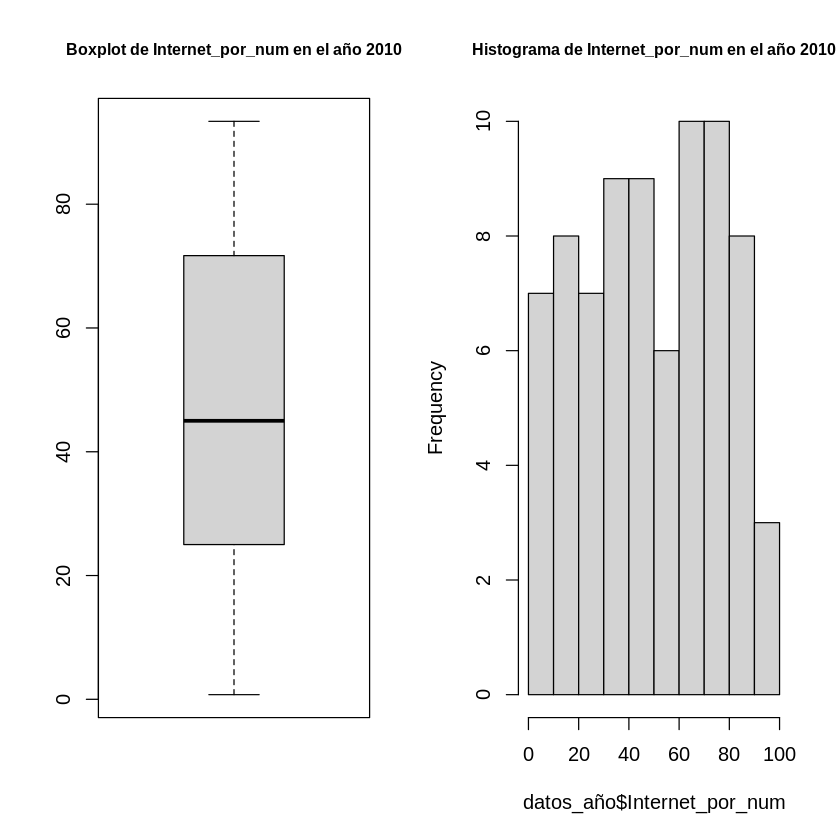

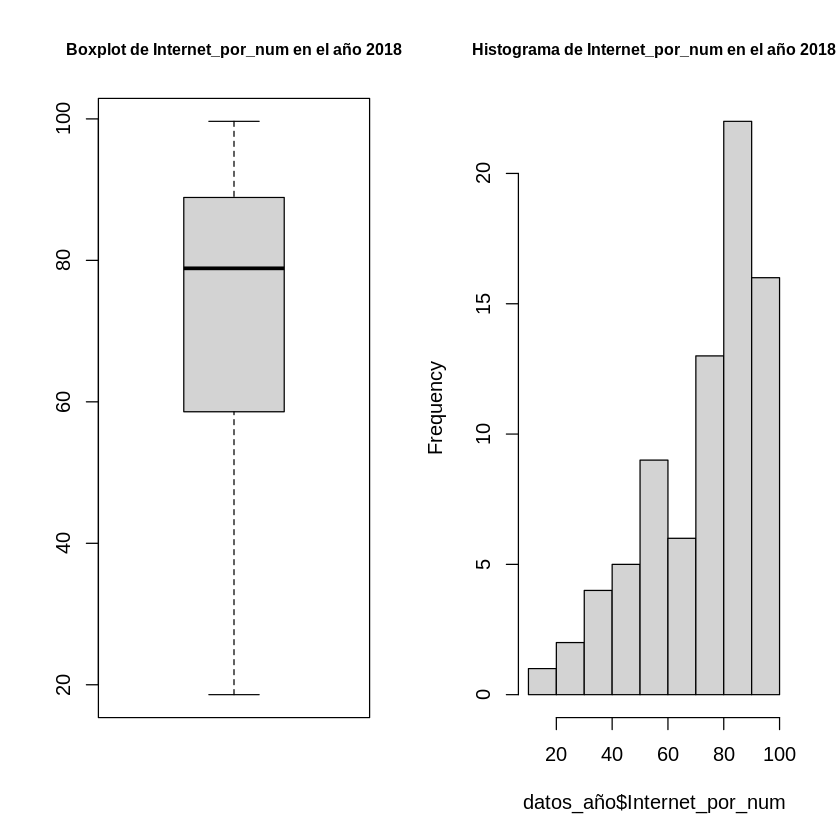

In [168]:
par(mfrow = c(1, 2))
for (año in unique(datos$anyo)) {
  datos_año <- subset(datos, anyo == año)
  resumen <- summary(datos_año$Internet_por_num)
  cat("Análisis multivariante para año", año, ":\n")
  print(resumen)
  boxplot(datos_año$Internet_por_num, main = paste("Boxplot de Internet_por_num en el año", año), cex.main = 0.8)
  hist(datos_año$Internet_por_num, main = paste("Histograma de Internet_por_num en el año", año), cex.main = 0.8)
}
par(mfrow = c(1, 1))

Análisis multivariante para año 2010 :
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    26840    583495   2074530   5860011   4622090 125881220 
Análisis multivariante para año 2018 :
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   220000   3250000   7600000  24490551  26750000 300000000 


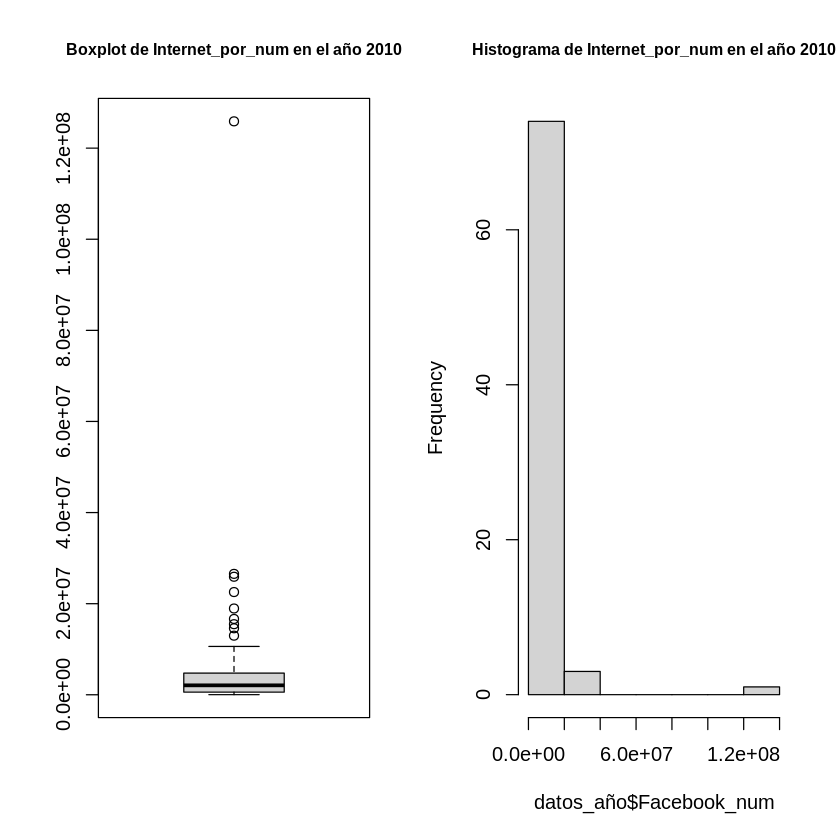

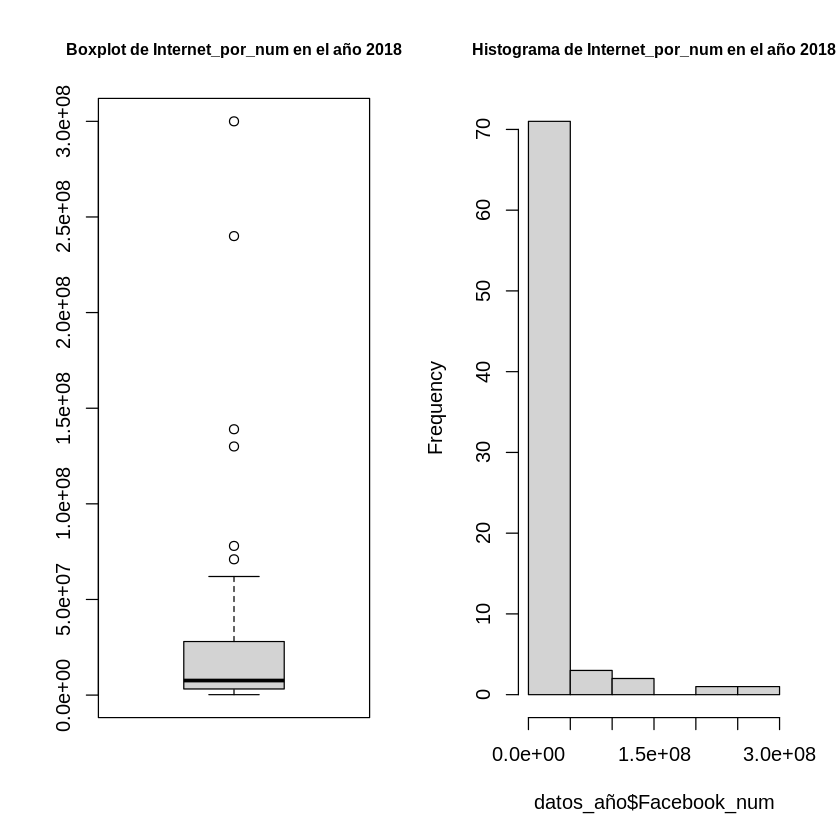

In [169]:
par(mfrow = c(1, 2))
for (año in unique(datos$anyo)) {
  datos_año <- subset(datos, anyo == año)
  resumen <- summary(datos_año$Facebook_num)
  cat("Análisis multivariante para año", año, ":\n")
  print(resumen)
  boxplot(datos_año$Facebook_num, main = paste("Boxplot de Internet_por_num en el año", año), cex.main = 0.8)
  hist(datos_año$Facebook_num, main = paste("Histograma de Internet_por_num en el año", año), cex.main = 0.8)
}
par(mfrow = c(1, 1))

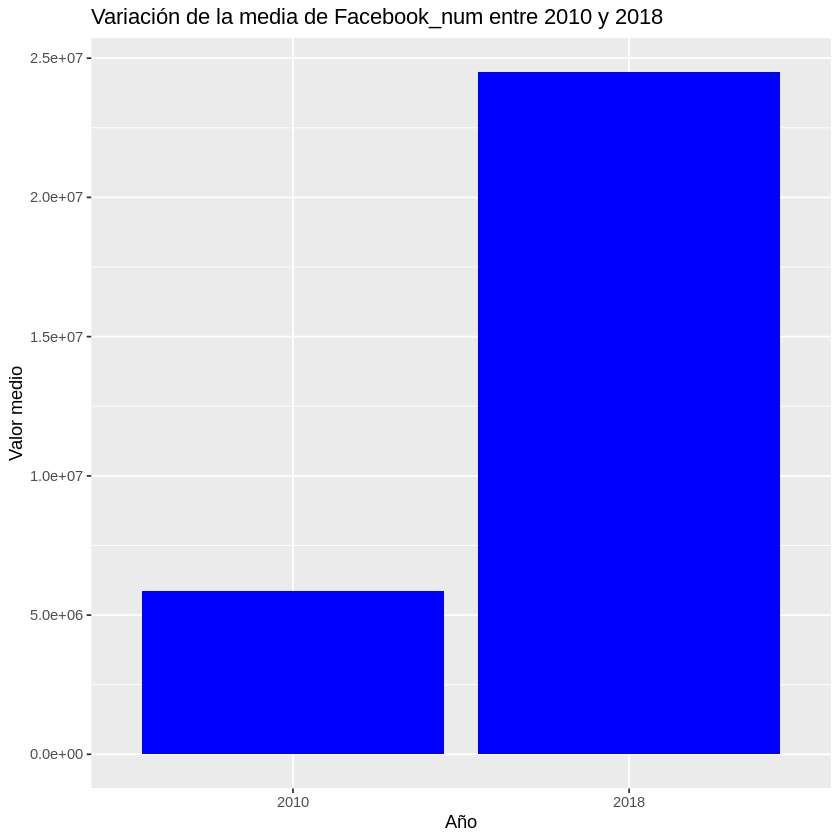

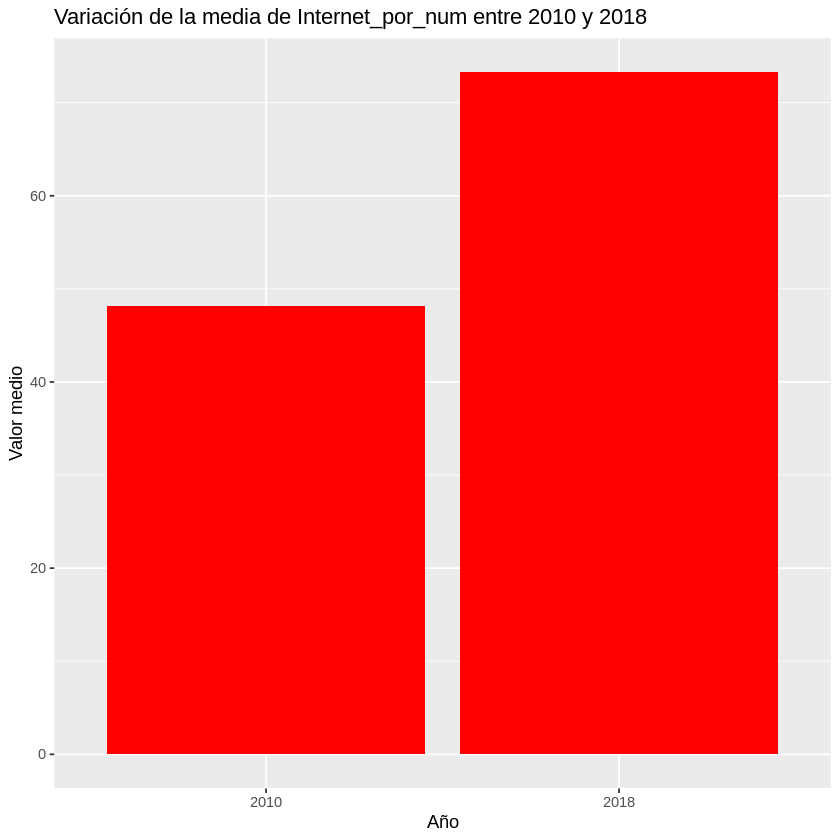

In [170]:
mean_facebook <- aggregate(Facebook_num ~ anyo, data = datos, FUN = mean)
mean_internet <- aggregate(Internet_por_num ~ anyo, data = datos, FUN = mean)

ggplot(mean_facebook, aes(x = factor(anyo), y = Facebook_num)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Variación de la media de Facebook_num entre 2010 y 2018",
       x = "Año",
       y = "Valor medio")

ggplot(mean_internet, aes(x = factor(anyo), y = Internet_por_num)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Variación de la media de Internet_por_num entre 2010 y 2018",
       x = "Año",
       y = "Valor medio")

`geom_smooth()` using formula = 'y ~ x'


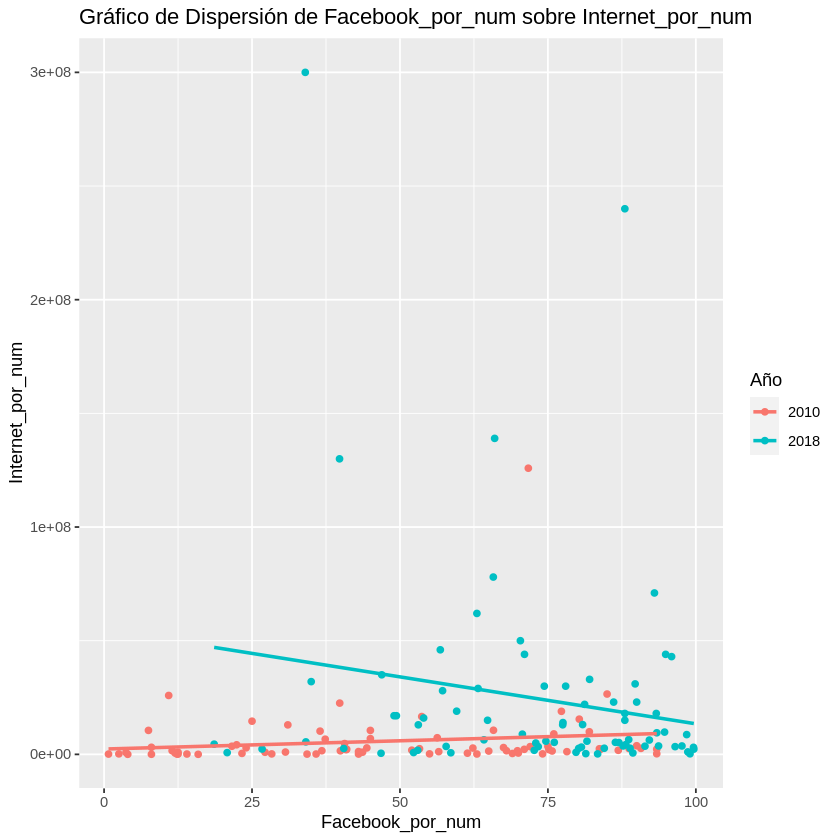

In [171]:
# Eliminar filas con valores no finitos o faltantes
datos <- datos[complete.cases(datos), ]

# Crear el gráfico de dispersión con rectas de regresión separadas por año
ggplot(datos, aes(x = Internet_por_num, y = Facebook_num, color = factor(anyo))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, aes(group = factor(anyo))) +
  labs(title = "Gráfico de Dispersión de Facebook_por_num sobre Internet_por_num",
       x = "Facebook_por_num",
       y = "Internet_por_num",
       color = "Año")

`geom_smooth()` using formula = 'y ~ x'


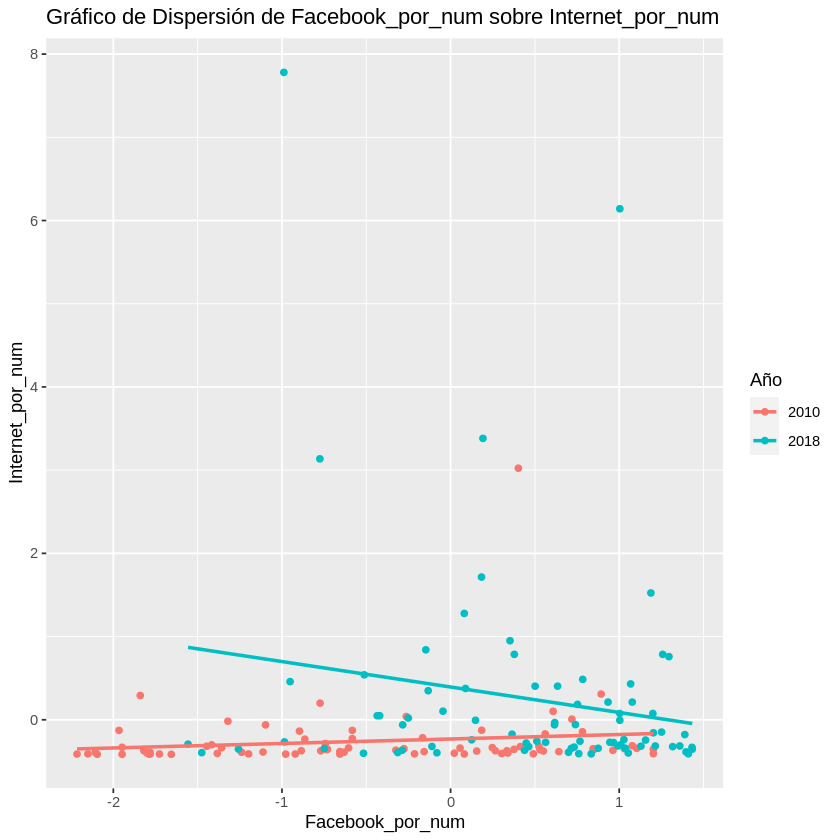

In [172]:
datos$scaled_Facebook_num <- scale(datos$Facebook_num)
datos$scaled_Internet_por_num <- scale(datos$Internet_por_num)
# Crear el gráfico de dispersión con rectas de regresión separadas por año
ggplot(datos, aes(x = scaled_Internet_por_num, y = scaled_Facebook_num, color = factor(anyo))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, aes(group = factor(anyo))) +
  labs(title = "Gráfico de Dispersión de Facebook_por_num sobre Internet_por_num",
       x = "Facebook_por_num",
       y = "Internet_por_num",
       color = "Año")

In [173]:
# Ajustar modelos de regresión lineal para cada año
model_2010 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2010, ])
model_2018 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2018, ])

# Comparar los coeficientes utilizando stargazer
library(stargazer)
stargazer(model_2010, model_2018, type = "text", title = "Comparación de Coeficientes de Regresión (2010 vs 2018)",
          keep.stat = c("n", "rsq"), align = TRUE)


Comparación de Coeficientes de Regresión (2010 vs 2018)
                        Dependent variable:       
                 ---------------------------------
                           Facebook_num           
                       (1)              (2)       
--------------------------------------------------
Internet_por_num   72,690.040      -413,076.700   
                  (63,480.420)     (262,854.600)  
                                                  
Constant          2,346,462.000  54,750,187.000***
                 (3,507,880.000) (19,985,826.000) 
                                                  
--------------------------------------------------
Observations           77               78        
R2                    0.017            0.031      
Note:                  *p<0.1; **p<0.05; ***p<0.01
